# Hello World Program

In this tutorial, we will learn the fundamentals of Qiskit, an quantum SDK and software which allows you to write and execute programs on a quantum computer! Qiskit is written in Python, which is the programming language we will use to write our programs

In most quantum computing exercises, we have to build and execute quantum circuits. Quantum circuits are a sequence of quantum gates, and these circuits are referred to as "an n-qubit register". First we will download qiskit from the anaconda terminal by running the following command. Be sure to update your python to a 3.7 version or above, as Qiskit is optimized for these versions of python.

In [ ]:
pip install qiskit

We have installed qiskit by running the command. There is alternative to writing qiskit programs, which is to do it via the IBM quantum experience cloud. For this you'll have to set up a IBM quantum experience account by clicking this link:https://quantum-computing.ibm.com/https://quantum-computing.ibm.com/

The next thing we'll do is start building the quantum register. We will have to first encode the input, do some computation and extract an output. First we will import qiskit library and its associated packages

In [1]:
from qiskit import *

Next, we will initialize a quantum register having 2 qubits. A qubit is the fundamental unit of a quantum circuit, the analogue of a bit in classical computing! We will also initialize a classical register having 2 qubits. Most circuits will be a combination of classical and quantum registers, as the quantum registers will be used to perform quantum mechanical operations on qubits, and classical registers will be used to perform classical operations on the measurements obtained.

In [2]:
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
circuit=QuantumCircuit(qr,cr)

In qiskit, we have the option to visualize how the quantum circuit looks by running the following command.

In [3]:
%matplotlib inline
circuit.draw()

q0_0: 
      
q0_1: 
      
c0_0: 
      
c0_1:

We will see two quantum bits and two classical bits

We will see the effect of applying a quantum gate on a single bit, the hadamard gate, which is a gate used for creating superposition

We will do this by running the following command to the first qubit in the quantum register. Note that indexing starts from 0 in Python

In [4]:
circuit.h(qr[0])

To visualize the circuit, we will run the command

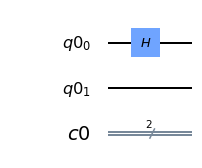

In [5]:
circuit.draw(output='mpl')

Let us explore more fundamental gates, like the cx gate which is a controlled-x gate, and the gate performs a NOT on the target qubit if the control qubit is in state 1. By default, all qubits are initialized to state 0.

In [6]:
circuit.cx(qr[0],qr[1])

The control qubit is the first parameter or qr[0] in this case and the target parameter is qr[1]

In the following circuit, the target qubit is a circle with an addition sign and the control is a dot.
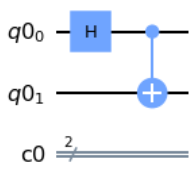

This circuit is used to implement entanglement between two qubits. After initializing a quantum circuit and performing computation by implementing quantum gates, we will extract the outputs by using .measure() function in Qiskit. In this example, the classical bits will be used to store the outputs

In [7]:
circuit.measure(qr,cr)

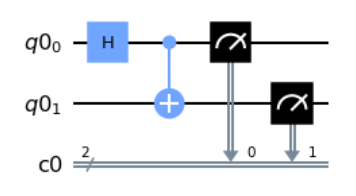

The arrows point from the qubits, to the classical bits which are used to store the extracted outputs.

Now, the fun part is executing the circuit we built on a quantum computer. There are many quantum devices that Qiskit has. In order to use these devices, we will first have to load an IBMQ account( Note : follow this link [https://quantum-computing.ibm.com/account](https://quantum-computing.ibm.com/account) to create an account)

In [8]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Next, we will have to give details of the IBMQ provider and quantum computer that we choose to execute our circuit on.

In [9]:
provider=IBMQ.get_provider('ibm-q')
quantum_computer=provider.get_backend('ibmq_16_melbourne')

We use the execute() function to run our quantum circuit using ibmq_vigo as our backend

In [10]:
execute_circuit=execute(circuit,backend=quantum_computer)

To see the results, simply run the following command

In [11]:
result=execute_circuit.result()

To visualize the results, run the following command

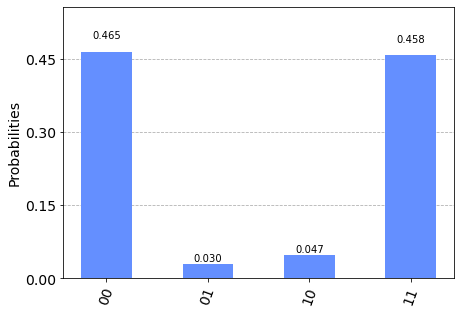

In [13]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

Theoretically, we can compare the results we get on a quantum computer vs the results simulated on a quantum simulator.

Run the following command to get the simulator backend(we will use the qasm_simulator)

In [14]:
simulator=Aer.get_backend('qasm_simulator')

Next execute the circuit

In [15]:
result=execute(circuit,backend=simulator).result()


Plot the histogram of results to see the probabilities of getting each state in the output

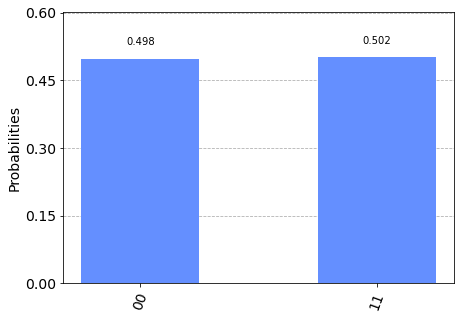

In [16]:
plot_histogram(result.get_counts(circuit))

Comparing the results, we see that on the quantum computer we get a small probability for obtaining states other than 00 and 11. This means that the quantum computer does not give 100% accurate results, but gives us an approximation. This is because quantum computers are not prone from noise, and in our next tutorial we will explore quantum noise and how to mitigate noise